In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [42]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
from sklearn.cluster import AffinityPropagation
model_af = AffinityPropagation(damping=0.7,preference=-50)
clusters_af=model_af.fit_predict(X_scaled)
print(clusters_af)
x_af=X.copy()
x_af['Clusters']=clusters_af
print(x_af)
# Get results
labels = model_af.labels_
n_clusters = len(model_af.cluster_centers_indices_)
print(f"Estimated number of clusters: {n_clusters}")

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 2 3 4 3 4 3 2 3 4 3 4 3 4 3 4 3 2 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]
     Annual Income (k$)  Spending Score (1-100)  Clusters
0                    15                      39         0
1                    15                      81         1
2                    16                       6         0
3                    16                      77         1
4                    17                      40         0
..                  ...                     ...       ...
195                 120                      79         3
196                 126                      28         4
197                 126                      74         3
198          

Check cluster assignments and statistics:
labels = model_af.labels_
X['Cluster'] = labels
print(X.groupby('Cluster').size()) 
#Silhouette Score: Measure cluster cohesion/separation:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.2f}")

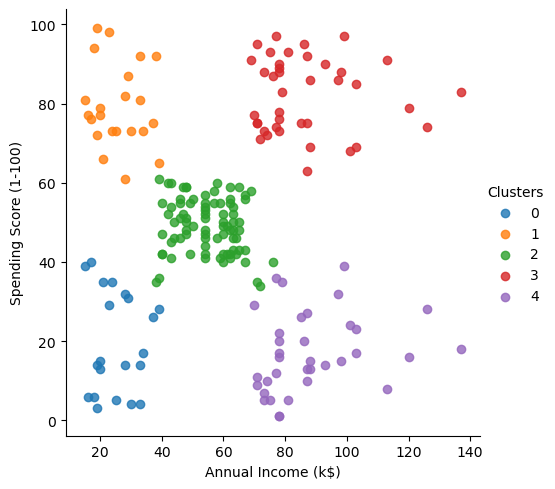

In [77]:
import seaborn as sns
sns.lmplot(data=x_af,x=x_af.columns[0],y=x_af.columns[1],hue=x_af.columns[2],fit_reg=False)

In [54]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X_scaled, quantile=0.15,random_state=42) 
model_ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
clusters_ms = model_ms.fit_predict(X_scaled)
print(clusters_ms)
x_ms=X.copy()
x_ms['Clusters']=clusters_ms
print(x_ms)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
     Annual Income (k$)  Spending Score (1-100)  Clusters
0                    15                      39         3
1                    15                      81         4
2                    16                       6         3
3                    16                      77         4
4                    17                      40         3
..                  ...                     ...       ...
195                 120                      79         2
196                 126                      28         1
197                 126                      74         2
198          

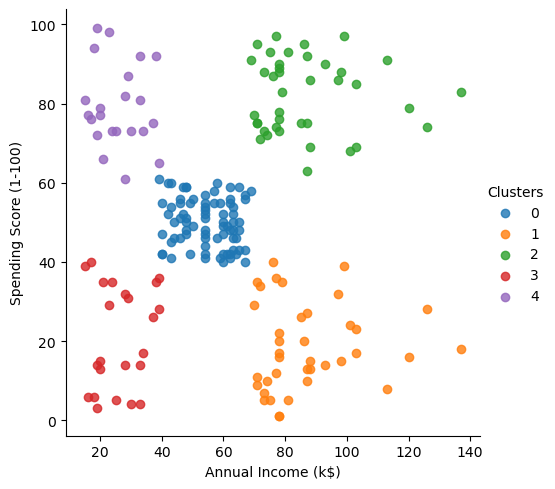

In [55]:
import seaborn as sns
sns.lmplot(data=x_ms,x=x_ms.columns[0],y=x_ms.columns[1],hue=x_ms.columns[2],fit_reg=False)

In [46]:
from sklearn.cluster import SpectralClustering

model_sc = SpectralClustering(
    n_clusters=5, 
    affinity='nearest_neighbors',
    random_state=42
)
clusters_sc = model_sc.fit_predict(X_scaled)
print(clusters_sc)
x_sc=X.copy()
x_sc['Clusters']=clusters_sc
print(x_sc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 3 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
     Annual Income (k$)  Spending Score (1-100)  Clusters
0                    15                      39         4
1                    15                      81         3
2                    16                       6         4
3                    16                      77         3
4                    17                      40         4
..                  ...                     ...       ...
195                 120                      79         1
196                 126                      28         0
197                 126                      74         1
198          

C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


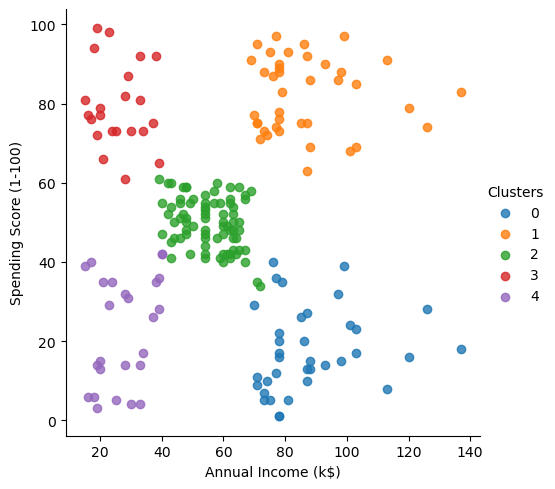

In [56]:
import seaborn as sns
sns.lmplot(data=x_sc,x=x_sc.columns[0],y=x_sc.columns[1],hue=x_sc.columns[2],fit_reg=False)

In [57]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=0.4, min_samples=5)  # tune `eps` using a k-distance plot
clusters_dbscan = model_dbscan.fit_predict(X_scaled)
print(clusters_dbscan)
x_dbscan=X.copy()
x_dbscan['Clusters']=clusters_dbscan
print(x_dbscan)

[ 0  0  1  0  0  0  1 -1  1  0  1 -1  1  0  1  0  0  0  0 -1  0  0  1  0
  1  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
     Annual Income (k$)  Spending Score (1-100)  Clusters
0                    15                      39         0
1                    15                      81         0
2                    16                       6         1
3                    16                      77         0
4                    17                      40         0
..                  ...                   

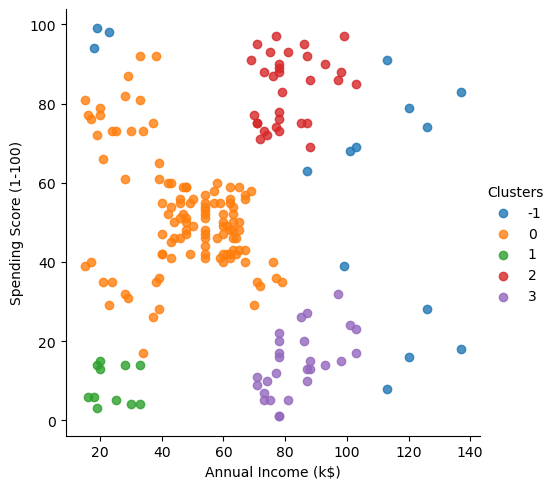

In [59]:
import seaborn as sns
sns.lmplot(data=x_dbscan,x=x_dbscan.columns[0],y=x_dbscan.columns[1],hue=x_dbscan.columns[2],fit_reg=False)

In [47]:
from sklearn.cluster import OPTICS

model_optics = OPTICS(min_samples=3, xi=0.1, min_cluster_size=0.1)
clusters_optics = model_optics.fit_predict(X_scaled)
print(clusters_optics)
x_optics=X.copy()
x_optics['Clusters']=clusters_optics
print(x_optics)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0
 -1 -1  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  3 -1  3 -1  3  2  3  2  3 -1  3  2  3  2  3  2  3  2  3 -1  3
  2  3 -1  3  2  3  2  3  2  3  2  3  2  3  2  3 -1  3  2  3  2 -1  2  3
  2 -1  2 -1  2  3  2 -1  2 -1  2 -1  2 -1  2 -1  2 -1  2 -1  2 -1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
     Annual Income (k$)  Spending Score (1-100)  Clusters
0                    15                      39        -1
1                    15                      81        -1
2                    16                       6        -1
3                    16                      77        -1
4                    17                      40        -1
..                  ...                   

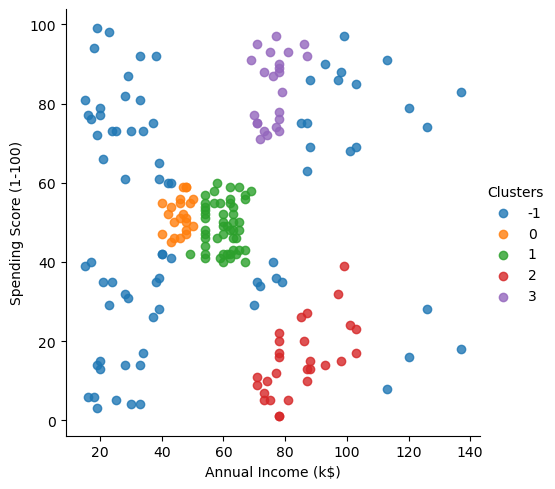

In [60]:
import seaborn as sns
sns.lmplot(data=x_optics,x=x_optics.columns[0],y=x_optics.columns[1],hue=x_optics.columns[2],fit_reg=False)

In [34]:
#pip install hdbscan

In [48]:
import hdbscan

model_hdbscan = hdbscan.HDBSCAN(min_cluster_size=5)
clusters_hdbscan = model_hdbscan.fit_predict(X_scaled)
print(clusters_hdbscan)
x_hdbscan=X.copy()
x_hdbscan['Clusters']=clusters_hdbscan
print(x_hdbscan)

[-1  3  1  3 -1  3  1 -1  1  3  1 -1  1  3  1  3  4 -1 -1 -1  4  3  1  3
  1  3 -1 -1  4 -1  1  3 -1 -1  1  3 -1  3 -1 -1  4 -1  4  4 -1  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  0 -1  0  4  0  2  0  2  0  4  0  2  0  2  0  2  0  2  0  4  0
  2  0  4  0  2  0  2  0  2  0  2  0  2  0  2  0 -1  0  2  0 -1  0  2  0
 -1 -1  2  0  2  0  2  0  2  0  2  0 -1  0  2  0 -1  0 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
     Annual Income (k$)  Spending Score (1-100)  Clusters
0                    15                      39        -1
1                    15                      81         3
2                    16                       6         1
3                    16                      77         3
4                    17                      40        -1
..                  ...                   

C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


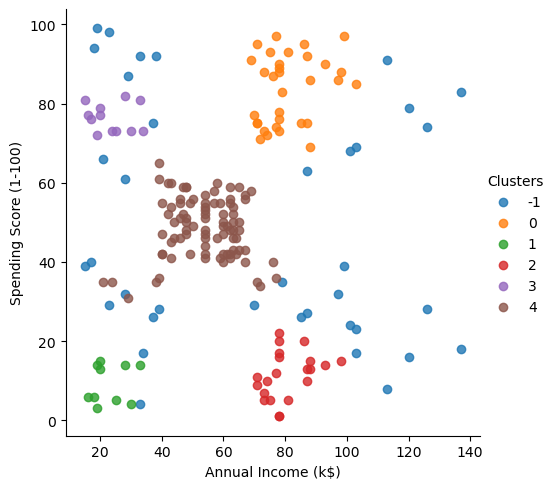

In [61]:
import seaborn as sns
sns.lmplot(data=x_hdbscan,x=x_hdbscan.columns[0],y=x_hdbscan.columns[1],hue=x_hdbscan.columns[2],fit_reg=False)

In [49]:
from sklearn.cluster import Birch

model_birch = Birch(threshold=0.5, n_clusters=5)  # `n_clusters` can be None
clusters_birch = model_birch.fit_predict(X_scaled)
print(clusters_birch)
x_birch=X.copy()
x_birch['Clusters']=clusters_birch
print(x_birch)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 4 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0
 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
     Annual Income (k$)  Spending Score (1-100)  Clusters
0                    15                      39         3
1                    15                      81         4
2                    16                       6         3
3                    16                      77         4
4                    17                      40         3
..                  ...                     ...       ...
195                 120                      79         2
196                 126                      28         0
197                 126                      74         2
198          

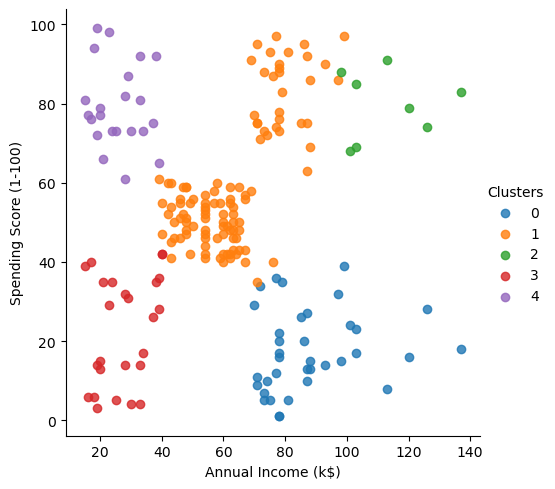

In [62]:
import seaborn as sns
sns.lmplot(data=x_birch,x=x_birch.columns[0],y=x_birch.columns[1],hue=x_birch.columns[2],fit_reg=False)

In [ ]:
#Interpretation:

#High-Income High-Spenders: Likely target for luxury campaigns.

#Low-Income High-Spenders: Budget-conscious but frequent shoppers.

#Low-Spending Clusters: May need re-engagement strategies.

In [ ]:
cluster_stats